# Object Detection

In [1]:
#Download pretrained model
!gdown --id 15ol8TU9pZHemhbpbW3MJxYa-1gheMDN3

#mask rcnn library
!git clone https://github.com/matterport/Mask_RCNN.git
%cd Mask_RCNN/
!python3 setup.py install

#libraries for object detection
%tensorflow_version 1.x
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
import matplotlib.pyplot as plt
from mrcnn.visualize import * 
from mrcnn.visualize import display_instances
from mrcnn import visualize
import skimage 
import cv2
import uuid
import time
from skimage import img_as_ubyte
import skimage.transform

#libraries for color detection
!pip install webcolors==1.3
import webcolors
from PIL import Image, ImageDraw
import argparse
import sys
import time
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Downloading...
From: https://drive.google.com/uc?id=15ol8TU9pZHemhbpbW3MJxYa-1gheMDN3
To: /content/mask_rcnn_deepfashion2_0100.h5
256MB [00:02, 92.5MB/s]
Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 40.75 MiB/s, done.
Resolving deltas: 100% (562/562), done.
/content/Mask_RCNN
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:645: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:645: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:645: UserWarning: Usage of dash-separated 're

Using TensorFlow backend.


  Created wheel for webcolors: filename=webcolors-1.3-cp37-none-any.whl size=13010 sha256=9115444379f1669cc049cde451ddc81fe851995cac9352734b0696d64a9967f4
  Stored in directory: /root/.cache/pip/wheels/f5/5c/6d/fe4a555c7072e9637a6e1bfc40a9e6736a6f567dec50c8c33b
Successfully built webcolors


## Color detection module

In [2]:
def get_colors(cropped_img, numcolors=1):
    #convert from nupmy to PIL
    PIL_image = Image.fromarray(np.uint8(cropped_img)).convert('RGB')
    
    # Reduce to palette
    paletted = PIL_image.convert('P', palette=Image.ADAPTIVE, colors=numcolors)

    # Find dominant colors
    palette = paletted.getpalette()
    color_counts = sorted(paletted.getcolors(), reverse=True)
    colors = list()
    for i in range(numcolors):
        palette_index = color_counts[i][1]
        dominant_color = palette[palette_index*3:palette_index*3+3]
        #rgb to hex color 
        #dominant_color = webcolors.rgb_to_hex(tuple(dominant_color))
        colors.append(dominant_color)

    return colors

## Load rcnn model

In [3]:
class_names = ['short_sleeved_shirt', 'long_sleeved_shirt', 'short_sleeved_outwear', 'long_sleeved_outwear', 'vest', 'sling', 
               'shorts', 'trousers', 'skirt/Pant', 'short_sleeved_dress', 'long_sleeved_dress',
               'vest_dress', 'sling_dress']

class TestConfig(Config):
     NAME = "test"
     GPU_COUNT = 1
     IMAGES_PER_GPU = 1
     NUM_CLASSES = 1 + 13

rcnn = MaskRCNN(mode='inference', model_dir='/content/', config=TestConfig())
rcnn.load_weights('/content/mask_rcnn_deepfashion2_0100.h5', by_name=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [72]:
def show_dominant_colors(arr):
    color_deck = np.zeros((10, 10, 3), dtype= np.uint8)
    steps = 300 / arr.shape[0]
    for idx, ele in enumerate(arr):
        color_deck[:, int(idx*steps):(int((idx+1)*steps)), :] = ele
    return color_deck

## Load images from directory

Processing 1 images
image                    shape: (200, 200, 3)         min:    1.00000  max:  251.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  126.30000  float64
image_metas              shape: (1, 26)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 1 images
image                    shape: (200, 200, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 26)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 1 images
image                    shape: (200, 200, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  144.1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Processing 1 images
image                    shape: (200, 200, 3)         min:    0.00000  max:  253.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  146.10000  float64
image_metas              shape: (1, 26)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Processing 1 images
image                    shape: (200, 200, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 26)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


<Figure size 432x288 with 0 Axes>

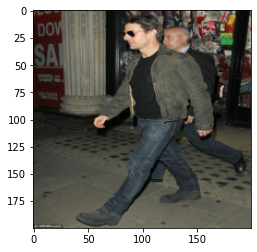

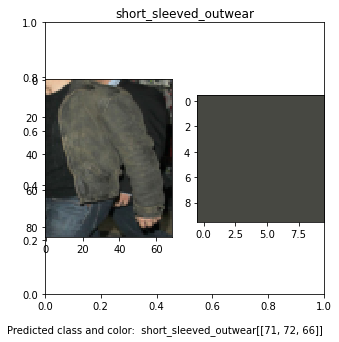

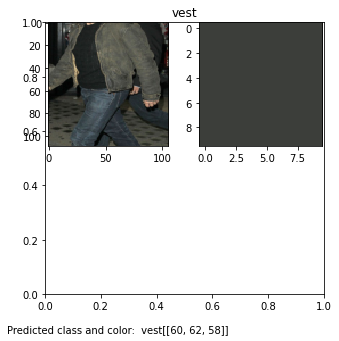

<Figure size 360x360 with 0 Axes>

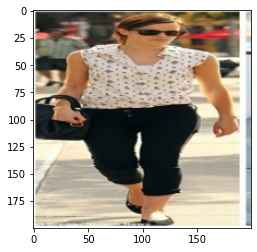

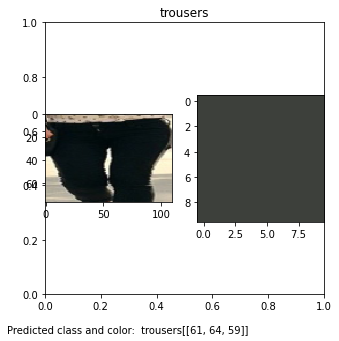

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

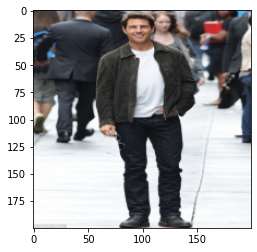

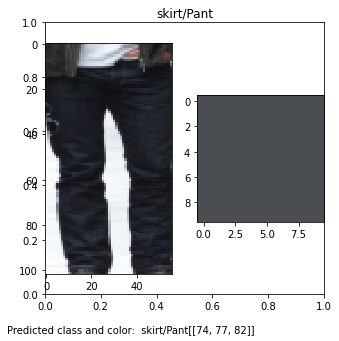

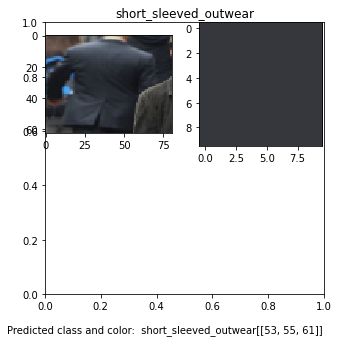

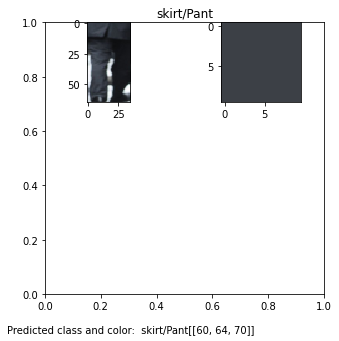

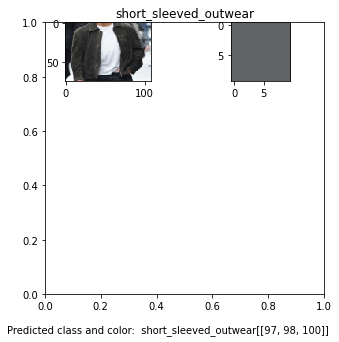

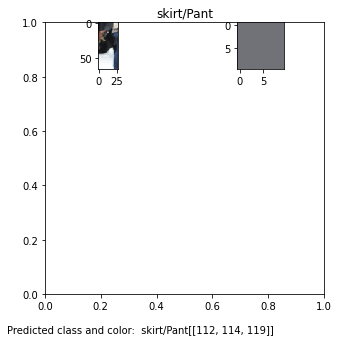

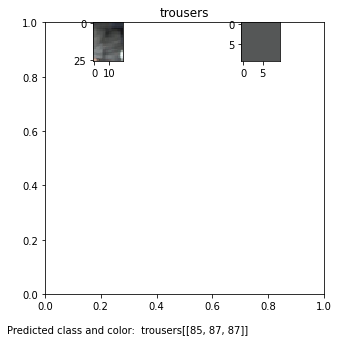

<Figure size 360x360 with 0 Axes>

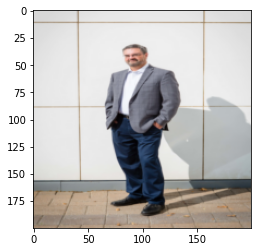

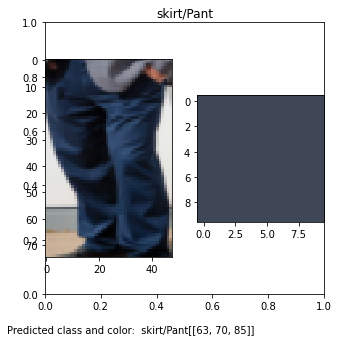

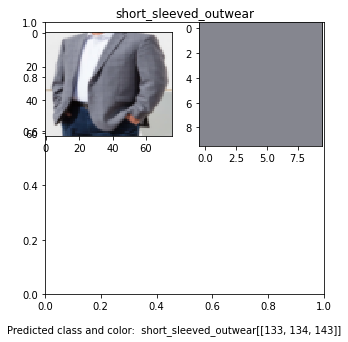

<Figure size 360x360 with 0 Axes>

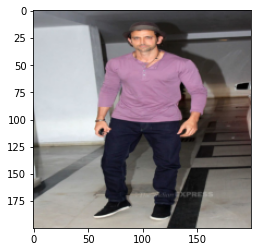

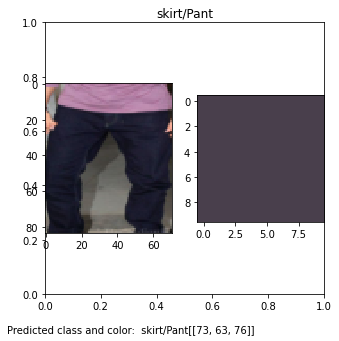

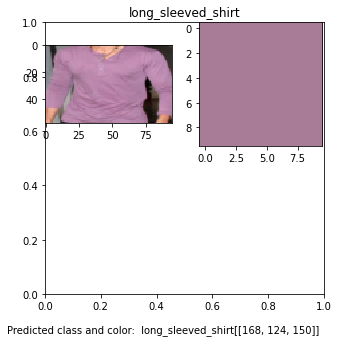

<Figure size 360x360 with 0 Axes>

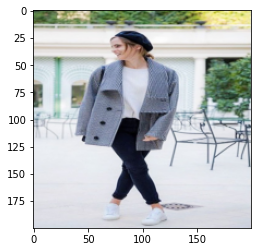

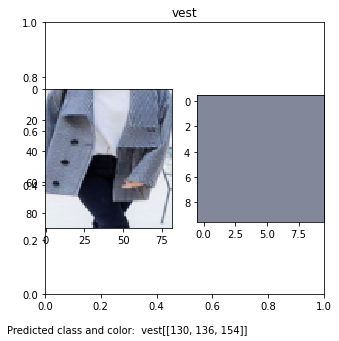

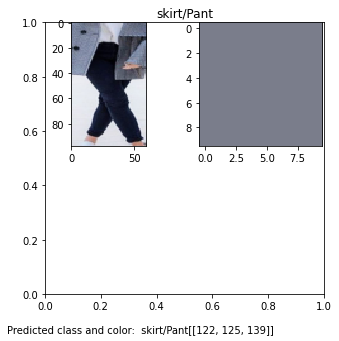

In [103]:
import os
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = skimage.io.imread('/content/images/' + filename)
        img = img_as_ubyte(skimage.transform.resize(img, (200, 200)))
        if img is not None:
            images.append(img)
    return images

imgs = load_images_from_folder("/content/images")

for index, img in enumerate(imgs): 
  results = rcnn.detect([img], verbose=1)
  results = results[0] 
  plt.clf()
  fig=plt.figure()
  plt.imshow(img)
  
  for i in range(len(results['rois'])):
    x = results['rois'][i][0]
    y = results['rois'][i][1]
    width = results['rois'][i][2]
    height = results['rois'][i][3]
    
    cropped_img = img[x:width, y:height]
    
    predicted_colors = get_colors(cropped_img)
    class_name = class_names[results['class_ids'][i]]
    
    predicted_color = show_dominant_colors(np.array(predicted_colors))

    f = plt.figure(figsize=(5,5))
    plt.title(class_name)
    f.text(.02, .02, "Predicted class and color:  " + str(class_name) + str(predicted_colors))
    f.add_subplot(i+1, 2, 1)
    imshow(np.asarray(cropped_img),interpolation='nearest')

    f.add_subplot(i+1, 2, 2)
    imshow(predicted_color,interpolation='nearest')
        